In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-data-analytics/test_mSzZ8RL.csv
/kaggle/input/sample-submission/sample_submission_eyYijxG.csv
/kaggle/input/train-data/train_s3TEQDk.csv


In [10]:
test = pd.read_csv('/kaggle/input/test-data-analytics/test_mSzZ8RL.csv')

In [11]:
#Importing all the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Reading the Dataset

df = pd.read_csv('/kaggle/input/train-data/train_s3TEQDk.csv')

In [13]:
#Reviewing the first 5 rows of the dataset

df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [14]:
# basic statistical analysis of the dataset

df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


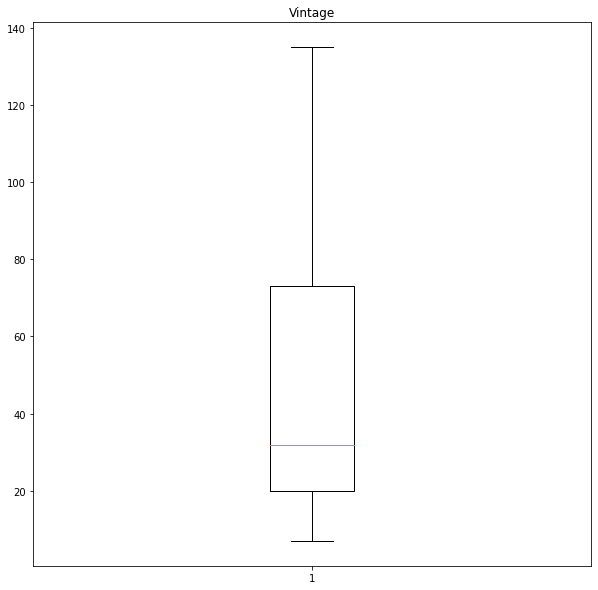

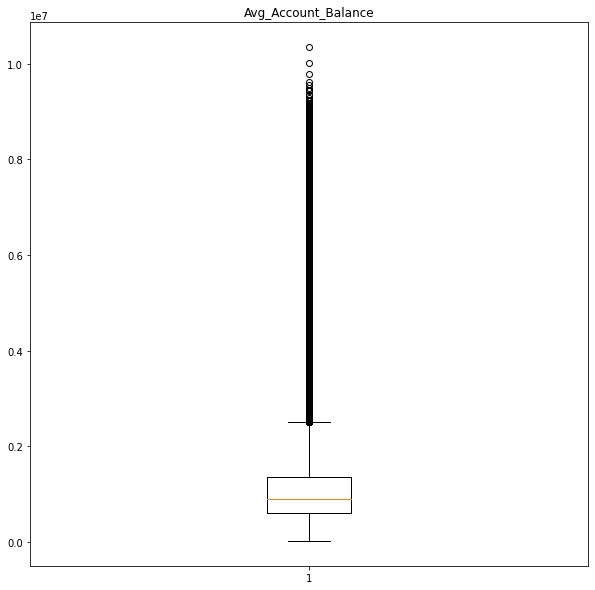

In [15]:
#Function to plot boxplots for all the column as this will help in detecting outlier

def box(column_name):
    f=plt.figure(figsize=(10,10))
    plt.title(column_name)
    plt.boxplot(df[column_name])

for i in ['Vintage','Avg_Account_Balance']:
    box(i)
    

In [16]:
df = df[df['Avg_Account_Balance']<=max(test.Avg_Account_Balance)].reset_index(drop=True)

#removing outlier rows from the dataset
#we also have an option either to replace with mean or median

from scipy import stats
df[(np.abs(stats.zscore(df['Avg_Account_Balance'])) < 3)]

In [34]:
#Exporting the data to csv file

df.to_csv(r'/kaggle/working/rem_out.csv', index = False)

In [17]:
# Applying preprocessing techniques on the dataset

#Label encoding all the categorical columns of the dataset

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df[['Gender']]=df[['Gender']].apply(lambda x:x.astype('category').cat.codes)
df[['Region_Code']]=df[['Region_Code']].apply(lambda x:x.astype('category').cat.codes)
df[['Occupation']]=df[['Occupation']].apply(lambda x:x.astype('category').cat.codes)
df[['Channel_Code']]=df[['Channel_Code']].apply(lambda x:x.astype('category').cat.codes)
df[['Credit_Product']]=df[['Credit_Product']].apply(lambda x:x.astype('category').cat.codes)
df[['Is_Active']]=df[['Is_Active']].apply(lambda x:x.astype('category').cat.codes)


In [18]:
#Reviewing the firsst 5 rows of the dataset

df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0


In [19]:
#Replacing negative values (represeting NaN) with 3

df["Credit_Product"].replace({-1: 2}, inplace=True)
print(df['Gender'].unique())
print(df['Region_Code'].unique())
print(df['Occupation'].unique())
print(df['Channel_Code'].unique())
print(df['Credit_Product'].unique())
print(df['Is_Active'].unique())

[0 1]
[18 27 20 32 11 15 33  4 19  7 29 30  2 34  9 31  8 16 10 24  6 25 23 17
 22  1 12 14 28 26 13  0  5  3 21]
[1 2 3 0]
[2 0 1 3]
[0 2 1]
[0 1]


In [20]:
#Checking for any null values

df['Is_Lead'].isnull().values.any()


False

In [46]:
#Dividing the dataset into independent and dependent variable

independent_variables=['Gender','Age','Region_Code','Occupation','Credit_Product','Avg_Account_Balance','Is_Active']
dependent_variable=['Is_Lead']
X=df[independent_variables]
Y=df[dependent_variable]

In [21]:
Target_col = 'Is_Lead'

categorical_vars = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
conts = ['Age', 'Vintage', 'Avg_Account_Balance']

In [22]:
for i in categorical_vars:
    print(df.groupby(i)['Is_Lead'].value_counts().nlargest(8))

Gender  Is_Lead
1       0          98613
0       0          88823
1       1          35582
0       1          22705
Name: Is_Lead, dtype: int64
Region_Code  Is_Lead
18           0          25160
4            0          21127
33           0          20531
34           0          13504
18           1          10773
27           0           9851
30           0           9766
33           1           8884
Name: Is_Lead, dtype: int64
Occupation  Is_Lead
3           0          73045
2           0          60503
1           0          52983
3           1          27841
1           1          17189
2           1          11496
0           1           1761
            0            905
Name: Is_Lead, dtype: int64
Channel_Code  Is_Lead
0             0          94236
1             0          45519
2             0          43492
              1          25219
1             1          22207
0             1           9481
3             0           4189
              1           1380
Name: Is_Lead, dt

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [ ]:
for i in categorical_vars:
    print(train.groupby(i)['Is_Lead'].value_counts().nlargest(8))

In [23]:
concat = pd.concat([df.drop(['ID'], axis=1)])

In [24]:
results = concat[concat.duplicated(subset=['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Is_Active'], keep=False)].sort_values(by=['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Is_Active', 'Is_Lead']).fillna(method='ffill')

In [25]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
est.fit(df['Age'].values.reshape(-1,1))
df['Age_quantiles'] = est.transform(df['Age'].values.reshape(-1,1)).astype(int)

In [26]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
est.fit(df['Vintage'].values.reshape(-1,1))
df['Vintage_quantiles'] = est.transform(df['Vintage'].values.reshape(-1,1)).astype(int)

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
est.fit(df['Avg_Account_Balance'].values.reshape(-1,1))
df['Avg_Account_Balance_quantiles'] = est.transform(df['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)

In [30]:
df['Avg_Account_Balance_log'] = np.log(df['Avg_Account_Balance'])

df['Vintage_log'] = np.log(df['Vintage'])


In [31]:
X = df.drop(['ID', 'Is_Lead', 'Avg_Account_Balance_quantiles', 'Vintage', 'Avg_Account_Balance'], axis=1).values
Y = df[Target_col].values



from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler().fit(X)
X = transformer.transform(X)


In [34]:
X

array([[0.        , 0.85882353, 0.52941176, ..., 0.57142857, 0.86103358,
        0.76676645],
       [0.        , 0.35294118, 0.79411765, ..., 0.57142857, 0.82463038,
        0.70653247],
       [0.        , 0.65882353, 0.52941176, ..., 0.42857143, 0.88279337,
        0.66420266],
       ...,
       [0.        , 0.30588235, 0.91176471, ..., 0.        , 0.83344007,
        0.52289616],
       [0.        , 0.32941176, 0.67647059, ..., 0.42857143, 0.80248988,
        0.70006011],
       [1.        , 0.34117647, 0.55882353, ..., 0.28571429, 0.86581045,
        0.62066298]])

In [ ]:
!pip3 install auto-sklearn

In [ ]:
from sklearn.metrics import accuracy_score
from autosklearn.metrics import accuracy, f1_macro, roc_auc
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
# define search
model = AutoSklearnClassifier(time_left_for_this_task=10*60, per_run_time_limit=500, n_jobs=8)
# perform the search
model.fit(X_train, Y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
acc = roc_auc_score(Y_test, y_hat)
print("Accuracy: %.3f" % acc)

In [ ]:
model.fit_ensemble(X_train, ensemble_size=50)

In [ ]:
import autosklearn
def Run_model():
    automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=36000)
    automl.fit(X_train, Y_train, dataset_name='bottle_rocket')
    automl.fit_ensemble(Y_train, ensemble_size=50, metric=roc_auc)
    y_predict_test = automl.predict(X_test)
    return automl, y_predict_test

In [ ]:
automl, y_predict_test = Run_model()

In [ ]:
# Show the final ensemble produced by Auto-sklearn.
# print('\nModels: \n', automl.show_models())
print('\nStatistics: \n', automl.sprint_statistics())
# Show the actual model scores and the hyperparameters used. \
# print('\ncv results: \n', automl.cv_results_)
score = accuracy_score(y_test, y_predict_test)
name = automl._automl._metric.name
print("\nAccuracy score {0:.8f} using {1:s}".format(score, name))

In [ ]:
#Displaying the first five rows of both dependent and independent data

from IPython.display import display
display(X.head())
display(Y.head())

In [47]:
#Normalizing the Age column to maintain uniformity and the training process faster

df['Age']=df['Age']/df['Age'].abs().max()


In [48]:
#Normalizing the Avg_Account_Balance column to maintain uniformity and the training process faster

df['Avg_Account_Balance']=df['Avg_Account_Balance']/df['Avg_Account_Balance'].abs().max()

In [49]:
#Reviewing the Avg_Account_Balance column

df['Avg_Account_Balance']

0         0.101014
1         0.056220
2         0.143384
3         0.045446
4         0.085663
            ...   
245720    0.186011
245721    0.083361
245722    0.064785
245723    0.039365
245724    0.109088
Name: Avg_Account_Balance, Length: 245725, dtype: float64

In [50]:
df.to_csv(r'/kaggle/working/rem3_out.csv', index = False)

In [19]:
#Installing H2O automl for intelligent model selection and hyperparamter tuning

!pip install h2o

In [51]:
#Importing and initializing the H2O server

import h2o
h2o.init()

#Reading the dataset as H2O frame

bank_df = h2o.upload_file("/kaggle/working/rem3_out.csv")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 mins 58 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_dimg4w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.637 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [52]:
#Preparing dependent and independent variable data from H2O frame

x = bank_df.names
x.remove('Is_Lead')
x.remove("ID")
x.remove('Vintage')
x.remove('Channel_Code')
x.remove('Region_Code')
print(x)
Y="Is_Lead"

['Gender', 'Age', 'Occupation', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']


In [53]:
#Dividing the dataset into train and test data for on the go validation

train, test = bank_df.split_frame([0.9], seed=42)

In [55]:
#Using Random Forest Algorithm

from h2o.estimators import H2ORandomForestEstimator,H2OSupportVectorMachineEstimator
rf = H2ORandomForestEstimator(ntrees=200)

#Independent variable is converted to factor in case of classification

train[Y]=train[Y].asfactor()

#training the model

rf.train(x=x,
         y=Y,
         training_frame=train,
         validation_frame=test)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [56]:
#Printing the Model summary

print(rf)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1622228907068_493


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,200.0,200.0,40770048.0,20.0,20.0,20.0,12696.0,19636.0,16241.76




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11669924091784592
RMSE: 0.3416127060251798
LogLoss: 0.40162829544863815
Mean Per-Class Error: 0.22831584370742775
AUC: 0.8415821665569725
AUCPR: 0.7063153560282641
Gini: 0.683164333113945

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37198245714591344: 


,,0,1,Error,Rate
0,0,150707.0,17985.0,0.1066,(17985.0/168692.0)
1,1,19208.0,33157.0,0.3668,(19208.0/52365.0)
2,Total,169915.0,51142.0,0.1683,(37193.0/221057.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.371982,0.640672,193.0
1,max f2,0.143911,0.705091,292.0
2,max f0point5,0.630097,0.707551,111.0
3,max accuracy,0.569445,0.848727,128.0
4,max precision,0.999933,0.993555,0.0
5,max recall,0.000276,1.000000,399.0
6,max specificity,0.999933,0.999923,0.0
7,max absolute_mcc,0.513781,0.542828,144.0
8,max min_per_class_accuracy,0.204463,0.769254,264.0
9,max mean_per_class_accuracy,0.244922,0.771684,246.0



Gains/Lift Table: Avg response rate: 23.69 %, avg score: 23.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010043,0.998065,4.181532,4.181532,0.990541,0.999773,0.990541,0.999773,0.041994,0.041994,318.153194,318.153194,0.041869
1,2,0.020004,0.984662,4.004832,4.093542,0.948683,0.993150,0.969697,0.996475,0.039893,0.081887,300.483188,309.354155,0.081092
2,3,0.030001,0.963812,3.682798,3.956668,0.872398,0.974379,0.937274,0.989112,0.036818,0.118705,268.279818,295.666838,0.116239
3,4,0.040003,0.943921,3.595214,3.866295,0.851651,0.953776,0.915866,0.980277,0.035959,0.154664,259.521396,286.629456,0.150254
4,5,0.050001,0.925392,3.596841,3.812418,0.852036,0.934699,0.903103,0.971164,0.035959,0.190624,259.684075,281.241842,0.184275
5,6,0.100001,0.797255,3.463717,3.638068,0.820501,0.871055,0.861802,0.921109,0.173188,0.363812,246.371696,263.806769,0.345702
6,7,0.150002,0.569273,2.668158,3.314765,0.632046,0.678886,0.785217,0.840368,0.133410,0.497221,166.815819,231.476452,0.455002
7,8,0.200003,0.432843,1.792012,2.934076,0.424500,0.495204,0.695038,0.754077,0.089602,0.586823,79.201235,193.407648,0.506897
8,9,0.300000,0.270222,1.270163,2.379456,0.300882,0.343353,0.563656,0.617173,0.127012,0.713836,27.016339,137.945551,0.542298
9,10,0.400001,0.160398,0.875955,2.003576,0.207500,0.212725,0.474616,0.516060,0.087597,0.801432,-12.404512,100.357610,0.526043




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.117916866674924
RMSE: 0.3433902541932779
LogLoss: 0.3946082104693617
Mean Per-Class Error: 0.2299492864932815
AUC: 0.8418519979462585
AUCPR: 0.7071112068279614
Gini: 0.6837039958925171

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3566815166948363: 


,,0,1,Error,Rate
0,0,16540.0,2205.0,0.1176,(2205.0/18745.0)
1,1,2065.0,3858.0,0.3486,(2065.0/5923.0)
2,Total,18605.0,6063.0,0.1731,(4270.0/24668.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.356682,0.643751,203.0
1,max f2,0.159810,0.708420,287.0
2,max f0point5,0.656907,0.711781,107.0
3,max accuracy,0.578461,0.847495,131.0
4,max precision,0.999983,0.993056,0.0
5,max recall,0.000702,1.000000,399.0
6,max specificity,0.999983,0.999947,0.0
7,max absolute_mcc,0.542724,0.544219,141.0
8,max min_per_class_accuracy,0.206534,0.768529,266.0
9,max mean_per_class_accuracy,0.273822,0.770051,238.0



Gains/Lift Table: Avg response rate: 24.01 %, avg score: 24.19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010864,0.997137,4.133701,4.133701,0.992537,0.998685,0.992537,0.998685,0.044910,0.044910,313.370090,313.370090,0.044803
1,2,0.020026,0.981668,3.962071,4.055182,0.951327,0.990533,0.973684,0.994955,0.036299,0.081209,296.207076,305.518185,0.080515
2,3,0.030039,0.960529,3.591492,3.900618,0.862348,0.970508,0.936572,0.986806,0.035962,0.117170,259.149162,290.061844,0.114663
3,4,0.040011,0.942012,3.419861,3.780794,0.821138,0.950620,0.907801,0.977787,0.034104,0.151275,241.986112,278.079443,0.146420
4,5,0.050024,0.923633,3.574630,3.739528,0.858300,0.932401,0.897893,0.968703,0.035793,0.187067,257.463016,273.952816,0.180346
5,6,0.100008,0.802607,3.448696,3.594171,0.828062,0.868389,0.862991,0.918566,0.172379,0.359446,244.869568,259.417086,0.341415
6,7,0.150032,0.584975,2.689895,3.292664,0.645867,0.693332,0.790597,0.843468,0.134560,0.494006,168.989525,229.266422,0.452662
7,8,0.200016,0.443202,1.746303,2.906231,0.419303,0.506342,0.697811,0.759221,0.087287,0.581293,74.630330,190.623069,0.501752
8,9,0.300024,0.276626,1.288094,2.366852,0.309283,0.352075,0.568302,0.623505,0.128820,0.710113,28.809411,136.685183,0.539668
9,10,0.399992,0.164252,0.911996,2.003248,0.218978,0.218136,0.480997,0.522194,0.091170,0.801283,-8.800408,100.324844,0.528090




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-28 19:15:47,0.020 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-05-28 19:15:47,0.412 sec,1.0,0.399928,3.673492,0.751925,0.526074,2.704279,0.194119,0.404527,3.830494,0.747726,0.525986,2.650980,0.194544
2,,2021-05-28 19:15:48,0.868 sec,2.0,0.394032,3.265202,0.763419,0.542689,2.788860,0.196677,0.376286,1.790529,0.796325,0.607604,3.222963,0.215299
3,,2021-05-28 19:15:48,1.502 sec,3.0,0.388860,2.831913,0.771636,0.541894,2.614901,0.197453,0.364531,1.099587,0.813744,0.632276,3.074614,0.174518
4,,2021-05-28 19:15:49,2.192 sec,4.0,0.385263,2.558084,0.777306,0.556593,2.738217,0.195393,0.360214,0.914370,0.818101,0.650820,3.331825,0.183720
5,,2021-05-28 19:15:50,2.978 sec,5.0,0.378785,2.171541,0.786192,0.574316,2.839528,0.193591,0.356044,0.758248,0.824176,0.666024,3.567782,0.171883
6,,2021-05-28 19:15:50,3.827 sec,6.0,0.373844,1.893002,0.793372,0.590128,2.964135,0.190716,0.353649,0.665308,0.827492,0.675068,3.746755,0.170545
7,,2021-05-28 19:15:55,8.309 sec,15.0,0.354575,0.861754,0.823443,0.664519,3.656726,0.182492,0.347879,0.500052,0.835845,0.694550,3.915800,0.182625
8,,2021-05-28 19:16:01,13.871 sec,27.0,0.347699,0.590381,0.833042,0.688324,3.920577,0.179294,0.345310,0.443655,0.838850,0.702048,4.052724,0.177963
9,,2021-05-28 19:16:07,19.925 sec,39.0,0.345665,0.515769,0.836140,0.694573,4.018009,0.174493,0.344681,0.423584,0.839918,0.703698,4.093151,0.171923



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Credit_Product,1.871064e+06,1.000000,0.494784
1,Avg_Account_Balance,1.052787e+06,0.562667,0.278399
2,Age,6.051670e+05,0.323435,0.160030
3,Occupation,1.619871e+05,0.086575,0.042836
4,Is_Active,6.021218e+04,0.032181,0.015922
5,Gender,3.036202e+04,0.016227,0.008029


In [57]:
#Using automl for intelligent model selection and Hyperparameter tuning

from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs=300,
               seed=1,
                balance_classes=False,sort_metric='logloss'
                )

#Training models on the data
aml.train(x=x,
         y=Y,
         training_frame=train,
         validation_frame=test)

AutoML progress: |
19:17:34.153: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [58]:
#retrieving the leaderboard representing the training summary of all the models

lb = aml.leaderboard
print(lb)

model_id,logloss,auc,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210528_191734,0.353995,0.863614,0.736227,0.219497,0.326751,0.106766
StackedEnsemble_BestOfFamily_AutoML_20210528_191734,0.354509,0.863513,0.733418,0.217415,0.326951,0.106897
XGBoost_3_AutoML_20210528_191734,0.355057,0.863459,0.732912,0.218089,0.32715,0.107027
XGBoost_1_AutoML_20210528_191734,0.361041,0.861036,0.722817,0.223898,0.329779,0.108754
XGBoost_grid__1_AutoML_20210528_191734_model_1,0.363337,0.856513,0.729098,0.222896,0.330853,0.109464
GBM_grid__1_AutoML_20210528_191734_model_1,0.364641,0.858761,0.716914,0.223197,0.332591,0.110617
DeepLearning_1_AutoML_20210528_191734,0.367404,0.854528,0.705578,0.226382,0.332877,0.110807
DeepLearning_grid__1_AutoML_20210528_191734_model_1,0.372315,0.851892,0.692439,0.234929,0.336322,0.113113
DeepLearning_grid__2_AutoML_20210528_191734_model_1,0.373976,0.85071,0.691392,0.238113,0.337008,0.113574
DeepLearning_grid__3_AutoML_20210528_191734_model_1,0.382255,0.849998,0.688361,0.224887,0.340189,0.115729


# As we can see model with id StackedEnsemble_AllModels_AutoML_20210528_110550 performs best using this dataset (highest area under the curve score = 0.873487 ),
# so we will now try with LightGBM after saving this model

In [ ]:
# Get the top model of leaderboard

se = aml.leader
  
# Get the metalearner model of top model

model = h2o.get_model('StackedEnsemble_AllModels_AutoML_20210528_102809')
  


In [ ]:
#Saving the model to the local path , in case runtime resets

model_path = h2o.save_model(model = model, path ='/kaggle/working', force = True)

In [ ]:
#Loading the saved model from the output directory

saved_model = h2o.load_model('/kaggle/working/StackedEnsemble_AllModels_AutoML_20210528_090458')

In [ ]:
#reviewimg the validation data

test

In [ ]:
#Performing inference on validation data using the saved model

predictions=saved_model.predict(test[:-1])['predict']

In [ ]:
#Confirming the length of validation data

len(test)

In [ ]:
#Reading the test data as H2O Frame

test_data = h2o.upload_file("/kaggle/input/test-data-analytics/test_mSzZ8RL.csv")


In [ ]:
#Performing inference on test data using the saved model

predictions=saved_model.predict(test_data)['predict']

In [ ]:
#reviewimg the test data

predictions['predict']


In [ ]:
#Confirming the length of test data

len(test_data)

In [ ]:
#Converting H2O frame into pandas Dataframe

data_generated = h2o.as_list(predictions['predict'])

In [ ]:
#Checking the converted Dataframe

data_generated.head()

In [ ]:
#Converting the test data (H2O Frame) into pandas Dataframe

dataid = h2o.as_list(test_data['ID'])

In [ ]:
#Checking the converted Dataframe

dataid.head()

In [ ]:
#Concatenating the dataframes with axis=1 indicating joining columns

final_data = pd.concat([dataid,data_generated],axis=1,ignore_index=True,sort=False)

In [ ]:

#Renaming the columns of final dataframe for submission 

final_data.rename(columns = {0: 'ID', 1: 'Is_Lead'}, inplace = True)
final_data.head()

In [ ]:
#Exporting the dataframe as CSV to the local directory

final_data.to_csv(r'/kaggle/working/pranjal_submission.csv', index = False)

# Testing With LightGBM Final

In [4]:
#praparimg the test and train data
test =  pd.read_csv('/kaggle/input/test-data-analytics/test_mSzZ8RL.csv')
train = pd.read_csv( '/kaggle/input/train-data/train_s3TEQDk.csv')

In [5]:
#preparing the column names
Target_col = 'Is_Lead'
categorical_vars = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
conts = ['Age', 'Vintage', 'Avg_Account_Balance']

In [6]:
#removing the outliers
train = train[train['Avg_Account_Balance']<=max(test.Avg_Account_Balance)].reset_index(drop=True)

In [7]:
for i in categorical_vars:
    print(train.groupby(i)['Is_Lead'].value_counts().nlargest(8))

Gender  Is_Lead
Male    0          98613
Female  0          88823
Male    1          35582
Female  1          22705
Name: Is_Lead, dtype: int64
Region_Code  Is_Lead
RG268        0          25160
RG254        0          21127
RG283        0          20531
RG284        0          13504
RG268        1          10773
RG277        0           9851
RG280        0           9766
RG283        1           8884
Name: Is_Lead, dtype: int64
Occupation     Is_Lead
Self_Employed  0          73045
Salaried       0          60503
Other          0          52983
Self_Employed  1          27841
Other          1          17189
Salaried       1          11496
Entrepreneur   1           1761
               0            905
Name: Is_Lead, dtype: int64
Channel_Code  Is_Lead
X1            0          94236
X2            0          45519
X3            0          43492
              1          25219
X2            1          22207
X1            1           9481
X4            0           4189
              1      

In [8]:
#filling cells with NaN
train = train.fillna('Yes')
test = test.fillna('Yes')

In [9]:
#dividing the train and test data
train['set'] = 1
test['set'] = 0
concat = pd.concat([train.drop(['ID'], axis=1), test.drop('ID', axis=1)])

In [10]:
#Removing the redundant values
results = concat[concat.duplicated(subset=['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Is_Active'], keep=False)].sort_values(by=['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Is_Active', 'Is_Lead']).fillna(method='ffill')

In [11]:
train = train.drop('set', axis=1)
test = test.drop('set', axis=1)

In [12]:
#label encoding (convert categorical data into int )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['Gender'])
train['Gender'] = le.transform(train['Gender'])
test['Gender'] = le.transform(test['Gender'])

In [13]:
#label encoding (convert categorical data into int )

from sklearn.preprocessing import LabelEncoder
ole = LabelEncoder()
ole.fit(train['Occupation'])
train['Occupation'] = ole.transform(train['Occupation'])
test['Occupation'] = ole.transform(test['Occupation'])

In [14]:
#label encoding (convert categorical data into int )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['Channel_Code'])
train['Channel_Code'] = le.transform(train['Channel_Code'])
test['Channel_Code'] = le.transform(test['Channel_Code'])

In [15]:
#label encoding (convert categorical data into int )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['Credit_Product'])
train['Credit_Product'] = le.transform(train['Credit_Product'])
test['Credit_Product'] = le.transform(test['Credit_Product'])

In [16]:
#label encoding (convert categorical data into int )

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['Is_Active'])
train['Is_Active'] = le.transform(train['Is_Active'])
test['Is_Active'] = le.transform(test['Is_Active'])

In [17]:
# frequency encoding on region code column

dict_ = train['Region_Code'].value_counts(normalize=True).to_dict()
train['Region_Code'] = train['Region_Code'].map(dict_)
dict_ = test['Region_Code'].value_counts(normalize=True).to_dict()
test['Region_Code'] = test['Region_Code'].map(dict_)

In [18]:
from scipy import stats

#converting the vintage into normal representation of its data

fitted_data, fitted_lambda = stats.boxcox(np.abs(train['Vintage']))
train['Vintage_box'] = fitted_data
fitted_data, fitted_lambda = stats.boxcox(np.abs(test['Vintage']))
test['Vintage_box'] = fitted_data

In [19]:
#label encoding the column

from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
dis.fit(train['Age'].values.reshape(-1,1))
train['Age_quantiles'] = dis.transform(train['Age'].values.reshape(-1,1)).astype(int)
test['Age_quantiles'] = dis.transform(test['Age'].values.reshape(-1,1)).astype(int)

In [20]:
#label encoding the column

from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
dis.fit(train['Vintage'].values.reshape(-1,1))
train['Vintage_quantiles'] = dis.transform(train['Vintage'].values.reshape(-1,1)).astype(int)
test['Vintage_quantiles'] = dis.transform(test['Vintage'].values.reshape(-1,1)).astype(int)

In [21]:
#label encoding the column

from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')
dis.fit(train['Avg_Account_Balance'].values.reshape(-1,1))
train['Avg_Account_Balance_quantiles'] = dis.transform(train['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)
test['Avg_Account_Balance_quantiles'] = dis.transform(test['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)

In [22]:
#coverting average balance column into its log values

train['Avg_Account_Balance_log'] = np.log(train['Avg_Account_Balance'])
test['Avg_Account_Balance_log'] = np.log(test['Avg_Account_Balance'])

train['Vintage_log'] = np.log(train['Vintage'])
test['Vintage_log'] = np.log(test['Vintage'])

In [23]:
X = train.drop(['ID', 'Is_Lead', 'Avg_Account_Balance_quantiles', 'Vintage', 'Avg_Account_Balance'], axis=1).values
y = train[Target_col].values
X_test = test.drop(['ID', 'Avg_Account_Balance_quantiles', 'Vintage', 'Avg_Account_Balance'], axis=1).values


from sklearn.preprocessing import MaxAbsScaler

#Scale each feature by its maximum absolute value

transformer = MaxAbsScaler().fit(X)
X = transformer.transform(X)
X_test = transformer.transform(X_test)

In [29]:
#importing models

import lightgbm as lgb
from catboost import CatBoostClassifier
sample_submission = pd.read_csv('/kaggle/input/sample-submission/sample_submission_eyYijxG.csv')
!pip install catboost

In [44]:
#prepraring the data for iteration
predictions = np.zeros(test.shape[0])
data = np.zeros(train.shape[0])
y = train[Target_col].values

#setting up validation technique
strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#LightGBM configurations
params = {
        
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'is_unbalance': True,
        'metric': 'auc_roc',
        'num_leaves': 50,
        'learning_rate': 0.12345,
        'bagging_fraction': 0.95,
        'feature_fraction': 0.98,
        'bagging_freq': 6,
        'max_depth': -1,
        'max_bin': 1000,
        'min_data_in_leaf': 20,
        'verbose': 0,
        'seed': 2
    }

model = lgb.LGBMClassifier(**params)
#model = SVC()

#looping over the data
for i, (train_id, valid_id) in enumerate(strat.split(X,y)):
    print("fold ", i)  
    #dividig the data into train and validate 
    X_train, y_train = X[train_id], y[train_id]
    X_valid, y_valid = X[valid_id], y[valid_id]
    
    #fitting the model with the data
    model.fit(X_train, Y_train,  eval_set =[(X_valid, y_valid)],  early_stopping_rounds=200, verbose=1000,eval_metric='auc')
    
    #inferencing on the validation data
    data[valid_id] = model.predict_proba(X_valid)[:,1]
    predictions += model.predict_proba(X_test)[:,1]
    
#Calculating the AUCROC  score
roc_auc = roc_auc_score(y,data)
final_value = predictions/5
lgb_predictions = final_value

#preparing the submission file
sample_submission[Target_col] = final_value
sample_submission.to_csv('lgb_final.csv', index=False)
print("roc auc score :", roc_auc)
lgb_oobs = data
print("best model")


fold  0
[LightGBM] [Warning] feature_fraction is set=0.98, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.98
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.98, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.98
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] Auto-choosing row-wis

In [47]:
#Submission file after inferencing :
sample_submission.head()

,ID,Is_Lead
0,VBENBARO,0.156245
1,CCMEWNKY,0.635084
2,VK3KGA9M,0.156392
3,TT8RPZVC,0.084787
4,SHQZEYTZ,0.069266
